In [1]:
# coding: utf-8
# batch_norm_test
import sys, os
sys.path.append(os.pardir)

if not os.path.exists('dataset'):
    src=['../../../dataset/presentation'] 
    dst=['./dataset']
    os.symlink(src, dst)
if not os.path.exists('common'):
    src=['../../../common/presentation'] 
    dst=['./common']
    os.symlink(src, dst)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.1 - 0.138
epoch:1 | 0.097 - 0.119


/Users/honishi/DL-from-scratch-in-KV/deep-learning-from-scratch-master/ch06/presentation/6.3.1-6.4.3/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/honishi/DL-from-scratch-in-KV/deep-learning-from-scratch-master/ch06/presentation/6.3.1-6.4.3/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/honishi/DL-from-scratch-in-KV/deep-learning-from-scratch-master/ch06/presentation/6.3.1-6.4.3/common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:2 | 0.097 - 0.131
epoch:3 | 0.097 - 0.141
epoch:4 | 0.097 - 0.147
epoch:5 | 0.097 - 0.167
epoch:6 | 0.097 - 0.187
epoch:7 | 0.097 - 0.206
epoch:8 | 0.097 - 0.219
epoch:9 | 0.097 - 0.223
epoch:10 | 0.097 - 0.249
epoch:11 | 0.097 - 0.267
epoch:12 | 0.097 - 0.291
epoch:13 | 0.097 - 0.295
epoch:14 | 0.097 - 0.303
epoch:15 | 0.097 - 0.319
epoch:16 | 0.097 - 0.331


No handles with labels found to put in legend.


epoch:17 | 0.097 - 0.342
epoch:18 | 0.097 - 0.378
epoch:19 | 0.097 - 0.386
============== 2/16 ==============


/Users/honishi/DL-from-scratch-in-KV/deep-learning-from-scratch-master/ch06/presentation/6.3.1-6.4.3/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/honishi/DL-from-scratch-in-KV/deep-learning-from-scratch-master/ch06/presentation/6.3.1-6.4.3/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:0 | 0.094 - 0.097
epoch:1 | 0.097 - 0.118
epoch:2 | 0.097 - 0.129
epoch:3 | 0.097 - 0.137
epoch:4 | 0.097 - 0.149
epoch:5 | 0.097 - 0.168
epoch:6 | 0.097 - 0.179
epoch:7 | 0.097 - 0.206
epoch:8 | 0.097 - 0.229
epoch:9 | 0.097 - 0.267
epoch:10 | 0.097 - 0.301
epoch:11 | 0.097 - 0.32
epoch:12 | 0.097 - 0.349
epoch:13 | 0.097 - 0.383
epoch:14 | 0.097 - 0.407
epoch:15 | 0.097 - 0.428
epoch:16 | 0.097 - 0.456
epoch:17 | 0.097 - 0.469


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.491
epoch:19 | 0.097 - 0.506
============== 3/16 ==============
epoch:0 | 0.146 - 0.106
epoch:1 | 0.303 - 0.118
epoch:2 | 0.47 - 0.159
epoch:3 | 0.564 - 0.185
epoch:4 | 0.629 - 0.218
epoch:5 | 0.705 - 0.241
epoch:6 | 0.75 - 0.279
epoch:7 | 0.784 - 0.309
epoch:8 | 0.831 - 0.336
epoch:9 | 0.839 - 0.37
epoch:10 | 0.876 - 0.386
epoch:11 | 0.905 - 0.404
epoch:12 | 0.911 - 0.428
epoch:13 | 0.933 - 0.459
epoch:14 | 0.944 - 0.481
epoch:15 | 0.943 - 0.509
epoch:16 | 0.955 - 0.535
epoch:17 | 0.958 - 0.552


No handles with labels found to put in legend.


epoch:18 | 0.965 - 0.565
epoch:19 | 0.972 - 0.587
============== 4/16 ==============
epoch:0 | 0.1 - 0.09
epoch:1 | 0.244 - 0.132
epoch:2 | 0.385 - 0.179
epoch:3 | 0.464 - 0.257
epoch:4 | 0.538 - 0.345
epoch:5 | 0.595 - 0.419
epoch:6 | 0.64 - 0.485
epoch:7 | 0.677 - 0.527
epoch:8 | 0.714 - 0.572
epoch:9 | 0.732 - 0.595
epoch:10 | 0.752 - 0.626
epoch:11 | 0.777 - 0.66
epoch:12 | 0.786 - 0.679
epoch:13 | 0.798 - 0.702
epoch:14 | 0.817 - 0.728
epoch:15 | 0.818 - 0.738
epoch:16 | 0.838 - 0.755
epoch:17 | 0.849 - 0.767
epoch:18 | 0.852 - 0.794


No handles with labels found to put in legend.


epoch:19 | 0.854 - 0.802
============== 5/16 ==============
epoch:0 | 0.091 - 0.109
epoch:1 | 0.11 - 0.128
epoch:2 | 0.111 - 0.278
epoch:3 | 0.114 - 0.424
epoch:4 | 0.116 - 0.512
epoch:5 | 0.119 - 0.587
epoch:6 | 0.119 - 0.65
epoch:7 | 0.119 - 0.687
epoch:8 | 0.12 - 0.722
epoch:9 | 0.119 - 0.753
epoch:10 | 0.119 - 0.775
epoch:11 | 0.119 - 0.794
epoch:12 | 0.116 - 0.807
epoch:13 | 0.116 - 0.815
epoch:14 | 0.117 - 0.821
epoch:15 | 0.116 - 0.836
epoch:16 | 0.118 - 0.845


No handles with labels found to put in legend.


epoch:17 | 0.119 - 0.85
epoch:18 | 0.12 - 0.865
epoch:19 | 0.121 - 0.876
============== 6/16 ==============
epoch:0 | 0.11 - 0.076
epoch:1 | 0.117 - 0.206
epoch:2 | 0.116 - 0.429
epoch:3 | 0.117 - 0.596
epoch:4 | 0.117 - 0.68
epoch:5 | 0.117 - 0.739
epoch:6 | 0.134 - 0.772
epoch:7 | 0.117 - 0.797
epoch:8 | 0.117 - 0.813
epoch:9 | 0.117 - 0.838
epoch:10 | 0.117 - 0.846
epoch:11 | 0.117 - 0.866
epoch:12 | 0.117 - 0.883
epoch:13 | 0.117 - 0.893
epoch:14 | 0.117 - 0.904
epoch:15 | 0.117 - 0.914
epoch:16 | 0.117 - 0.923
epoch:17 | 0.117 - 0.928


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.941
epoch:19 | 0.117 - 0.945
============== 7/16 ==============
epoch:0 | 0.117 - 0.117
epoch:1 | 0.117 - 0.271
epoch:2 | 0.117 - 0.618
epoch:3 | 0.143 - 0.721
epoch:4 | 0.117 - 0.782
epoch:5 | 0.117 - 0.809
epoch:6 | 0.117 - 0.839
epoch:7 | 0.117 - 0.865
epoch:8 | 0.117 - 0.887
epoch:9 | 0.117 - 0.914
epoch:10 | 0.116 - 0.922
epoch:11 | 0.116 - 0.943
epoch:12 | 0.117 - 0.95
epoch:13 | 0.117 - 0.955
epoch:14 | 0.116 - 0.963
epoch:15 | 0.116 - 0.966
epoch:16 | 0.116 - 0.97
epoch:17 | 0.116 - 0.975
epoch:18 | 0.116 - 0.982


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.985
============== 8/16 ==============
epoch:0 | 0.092 - 0.091
epoch:1 | 0.117 - 0.346
epoch:2 | 0.117 - 0.689
epoch:3 | 0.117 - 0.799
epoch:4 | 0.117 - 0.847
epoch:5 | 0.116 - 0.888
epoch:6 | 0.116 - 0.909
epoch:7 | 0.116 - 0.939
epoch:8 | 0.116 - 0.957
epoch:9 | 0.116 - 0.972
epoch:10 | 0.116 - 0.981
epoch:11 | 0.116 - 0.99
epoch:12 | 0.116 - 0.993
epoch:13 | 0.116 - 0.995
epoch:14 | 0.116 - 0.996
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.116 - 1.0
epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.116 - 0.139
epoch:1 | 0.117 - 0.588
epoch:2 | 0.099 - 0.826
epoch:3 | 0.117 - 0.912
epoch:4 | 0.117 - 0.943
epoch:5 | 0.117 - 0.969
epoch:6 | 0.117 - 0.974
epoch:7 | 0.117 - 0.986
epoch:8 | 0.117 - 0.987
epoch:9 | 0.117 - 0.994
epoch:10 | 0.117 - 0.996
epoch:11 | 0.117 - 0.998
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.211
epoch:1 | 0.116 - 0.481
epoch:2 | 0.117 - 0.702
epoch:3 | 0.117 - 0.77
epoch:4 | 0.117 - 0.895
epoch:5 | 0.117 - 0.88
epoch:6 | 0.117 - 0.946
epoch:7 | 0.117 - 0.974
epoch:8 | 0.117 - 0.959
epoch:9 | 0.117 - 0.981
epoch:10 | 0.117 - 0.985
epoch:11 | 0.117 - 0.99
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.992
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.996


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.996
============== 11/16 ==============
epoch:0 | 0.087 - 0.196
epoch:1 | 0.105 - 0.619
epoch:2 | 0.105 - 0.704
epoch:3 | 0.117 - 0.813
epoch:4 | 0.117 - 0.813
epoch:5 | 0.117 - 0.83
epoch:6 | 0.116 - 0.847
epoch:7 | 0.116 - 0.909
epoch:8 | 0.116 - 0.945
epoch:9 | 0.116 - 0.937
epoch:10 | 0.116 - 0.978
epoch:11 | 0.116 - 0.976
epoch:12 | 0.116 - 0.978
epoch:13 | 0.116 - 0.989
epoch:14 | 0.116 - 0.993
epoch:15 | 0.117 - 0.992
epoch:16 | 0.117 - 0.994
epoch:17 | 0.117 - 0.995
epoch:18 | 0.117 - 0.997
epoch:19 | 0.117 - 0.998


No handles with labels found to put in legend.


============== 12/16 ==============
epoch:0 | 0.092 - 0.188
epoch:1 | 0.116 - 0.522
epoch:2 | 0.116 - 0.541
epoch:3 | 0.116 - 0.595
epoch:4 | 0.116 - 0.681
epoch:5 | 0.117 - 0.556
epoch:6 | 0.117 - 0.677
epoch:7 | 0.117 - 0.654
epoch:8 | 0.117 - 0.687
epoch:9 | 0.117 - 0.697
epoch:10 | 0.117 - 0.682
epoch:11 | 0.117 - 0.722
epoch:12 | 0.117 - 0.781
epoch:13 | 0.117 - 0.782
epoch:14 | 0.117 - 0.719
epoch:15 | 0.117 - 0.717
epoch:16 | 0.117 - 0.719
epoch:17 | 0.117 - 0.708
epoch:18 | 0.117 - 0.718
epoch:19 | 0.116 - 0.719


No handles with labels found to put in legend.


============== 13/16 ==============
epoch:0 | 0.087 - 0.193
epoch:1 | 0.116 - 0.46
epoch:2 | 0.117 - 0.542
epoch:3 | 0.117 - 0.51
epoch:4 | 0.117 - 0.59
epoch:5 | 0.117 - 0.602
epoch:6 | 0.116 - 0.597
epoch:7 | 0.116 - 0.687
epoch:8 | 0.117 - 0.683
epoch:9 | 0.117 - 0.682
epoch:10 | 0.116 - 0.691
epoch:11 | 0.117 - 0.695
epoch:12 | 0.117 - 0.782
epoch:13 | 0.117 - 0.749
epoch:14 | 0.117 - 0.791
epoch:15 | 0.117 - 0.793
epoch:16 | 0.117 - 0.782
epoch:17 | 0.117 - 0.783
epoch:18 | 0.117 - 0.694
epoch:19 | 0.117 - 0.782


No handles with labels found to put in legend.


============== 14/16 ==============
epoch:0 | 0.093 - 0.099
epoch:1 | 0.117 - 0.324
epoch:2 | 0.117 - 0.428
epoch:3 | 0.117 - 0.469
epoch:4 | 0.117 - 0.492
epoch:5 | 0.117 - 0.519
epoch:6 | 0.117 - 0.568
epoch:7 | 0.117 - 0.523
epoch:8 | 0.117 - 0.564
epoch:9 | 0.117 - 0.578
epoch:10 | 0.117 - 0.584
epoch:11 | 0.117 - 0.585
epoch:12 | 0.117 - 0.607
epoch:13 | 0.117 - 0.604
epoch:14 | 0.117 - 0.547
epoch:15 | 0.117 - 0.604
epoch:16 | 0.117 - 0.608
epoch:17 | 0.117 - 0.582
epoch:18 | 0.117 - 0.611


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.603
============== 15/16 ==============
epoch:0 | 0.093 - 0.117
epoch:1 | 0.117 - 0.324
epoch:2 | 0.117 - 0.43
epoch:3 | 0.117 - 0.446
epoch:4 | 0.116 - 0.462
epoch:5 | 0.116 - 0.425
epoch:6 | 0.116 - 0.5
epoch:7 | 0.116 - 0.506
epoch:8 | 0.116 - 0.506
epoch:9 | 0.116 - 0.535
epoch:10 | 0.116 - 0.518
epoch:11 | 0.116 - 0.49
epoch:12 | 0.116 - 0.522
epoch:13 | 0.116 - 0.586
epoch:14 | 0.116 - 0.565
epoch:15 | 0.116 - 0.601
epoch:16 | 0.117 - 0.569
epoch:17 | 0.116 - 0.605
epoch:18 | 0.116 - 0.603
epoch:19 | 0.116 - 0.612


No handles with labels found to put in legend.


============== 16/16 ==============
epoch:0 | 0.097 - 0.11
epoch:1 | 0.116 - 0.225
epoch:2 | 0.116 - 0.295
epoch:3 | 0.116 - 0.312
epoch:4 | 0.116 - 0.31
epoch:5 | 0.116 - 0.314
epoch:6 | 0.116 - 0.328
epoch:7 | 0.116 - 0.325
epoch:8 | 0.117 - 0.327
epoch:9 | 0.117 - 0.416
epoch:10 | 0.117 - 0.41
epoch:11 | 0.117 - 0.413
epoch:12 | 0.117 - 0.423
epoch:13 | 0.117 - 0.424
epoch:14 | 0.117 - 0.424
epoch:15 | 0.117 - 0.423
epoch:16 | 0.117 - 0.426
epoch:17 | 0.117 - 0.426
epoch:18 | 0.117 - 0.426
epoch:19 | 0.117 - 0.416


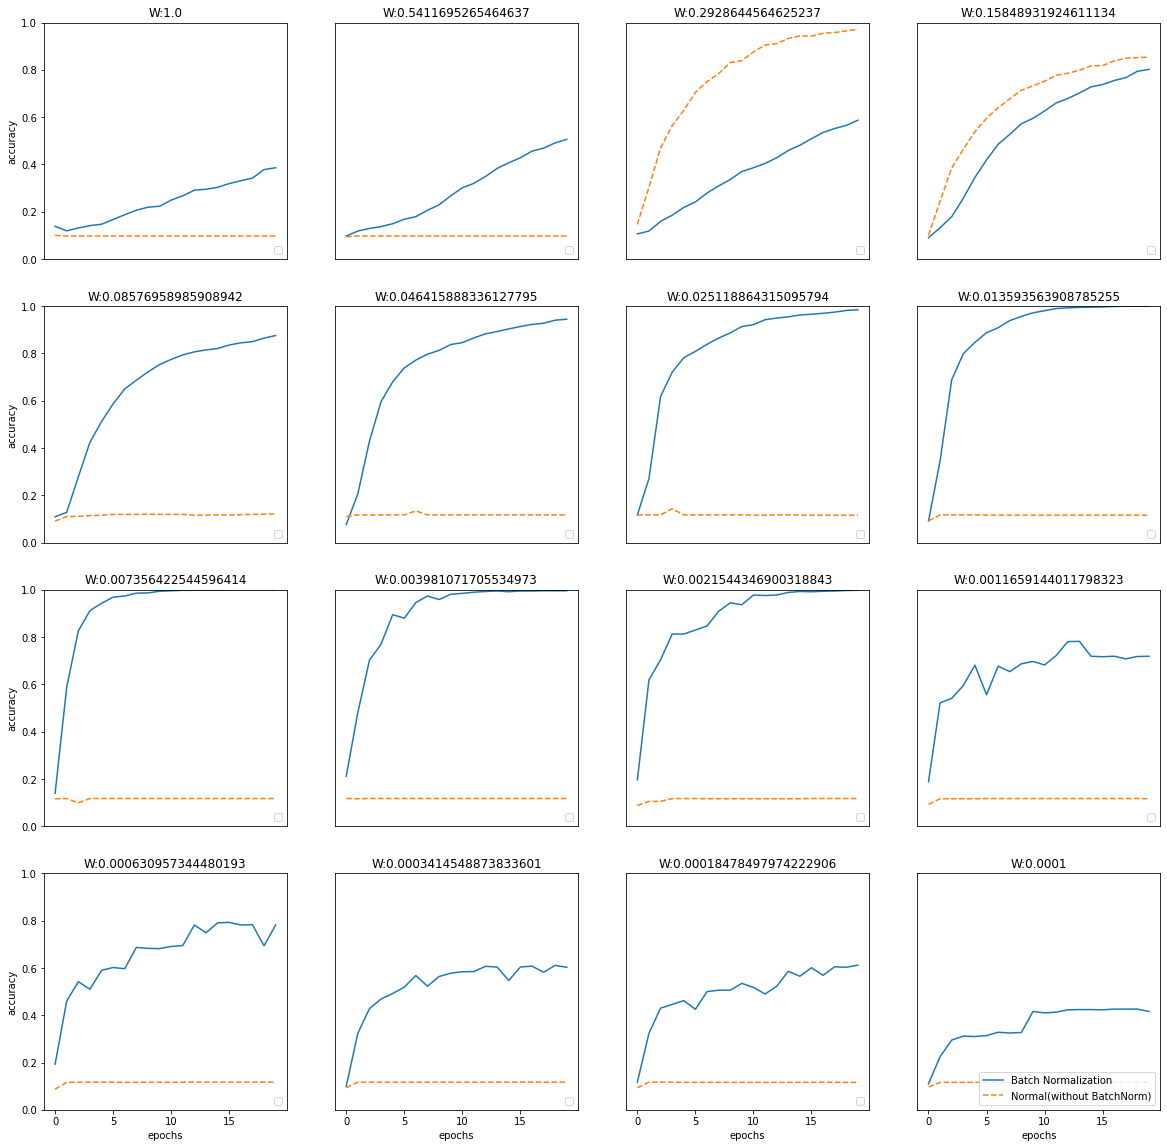

In [2]:
# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(20,20)) # グラフの全体サイズを拡大

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))

    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()